### CellStrat Hub Pack - Machine Learning

#### ML4 - Polynomial Regression

In [9]:
# -*- coding: utf-8 -*-

#==============================================================================
# First step to write the python program is to take benefit out of libraries
# already available. We will only focus on the data science related libraries.
#==============================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#==============================================================================
# #import data from the data file. In our case its Insurance.csv. 
#==============================================================================

insuranceData = pd.read_csv ('Insurance.csv')

#==============================================================================
# All mathematical operations will be performed on the matrix, so now we create
# matrix for dependent variables and independent variables.
#==============================================================================

X = insuranceData.iloc [:,0:1].values
y = insuranceData.iloc [:, 1].values

In [11]:
#==============================================================================
# We will not distribute the dataset into test and train as we have very less 
# number of data and which is not equally distributed, so if we miss any of 
# the value, it may have severe implications on the model creation.
#==============================================================================

In [12]:
#==============================================================================
# Let us first fit data with linear regression to see the comparison later
#==============================================================================

from sklearn.linear_model import LinearRegression
linregressor = LinearRegression()
linregressor.fit(X, y)

LinearRegression()

In [13]:
#==============================================================================
# Now fit the polynomial regressor. First we will use degree 2 and later higher
# If one changes the degree from 2 to 3 or higher, a higher tendency to overfit
# is seen.
#==============================================================================

from sklearn.preprocessing import PolynomialFeatures # Features

# First create a polynomial
polyfeature = PolynomialFeatures(degree = 4)
Poly_Matrix = polyfeature.fit_transform(X)

# Now fit the polynomial matrix into linear regressor
linregressor2 = LinearRegression()
linregressor2.fit(Poly_Matrix, y)

LinearRegression()

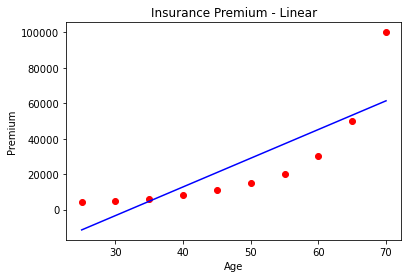

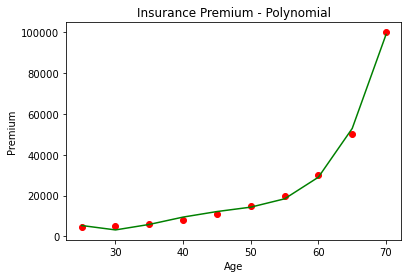

In [14]:
#==============================================================================
# Visualize both linear and polynomial regressor algo outcome
#==============================================================================
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, linregressor.predict(X), color = 'blue')
plt.title('Insurance Premium - Linear')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'red')
plt.plot(X, linregressor2.predict(polyfeature.fit_transform(X)), color = 'green')
plt.title('Insurance Premium - Polynomial')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

In [15]:
#==============================================================================
# Now see how accurately polynomial and linear regressor predict premium based
# on age
#==============================================================================
#Declare an array of value 68
val = np.array([68])
#Reshape from 1D to 2D ( Since the model expects min 2D array)
val=val.reshape(-1,1)
predictionlinear = linregressor.predict (val)
predictionPoly = linregressor2.predict (polyfeature.fit_transform(val))

print ("linear prediction = ", predictionlinear)
print ("polynomial prediction = ", predictionPoly)

linear prediction =  [58110.3030303]
polynomial prediction =  [77167.23457481]


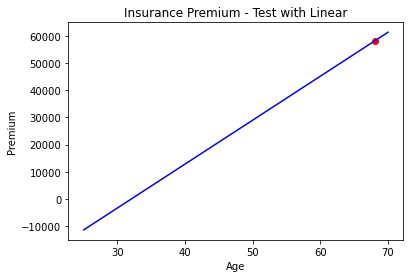

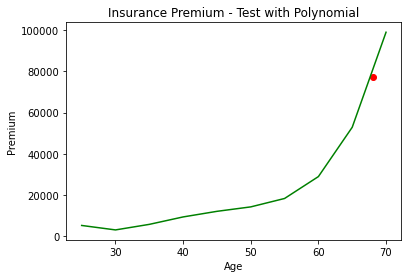

In [16]:
# now let's see visually whether the respective regressors gave the correct output for val = 68
# note the correct output in prior polynomial trend and compare with what the following graphs predict
# for val = 68, we expect output value closer to 70000 as per initial data trend
# Visualising the Linear Regression results
plt.scatter(val, predictionlinear, color = 'red')
plt.plot(X, linregressor.predict(X), color = 'blue')
plt.title('Insurance Premium - Test with Linear')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()

# Visualising the Polynomial Regression results
plt.scatter(val, predictionPoly, color = 'red')
plt.plot(X, linregressor2.predict(polyfeature.fit_transform(X)), color = 'green')
plt.title('Insurance Premium - Test with Polynomial')
plt.xlabel('Age')
plt.ylabel('Premium')
plt.show()